<p style="text-align: center;">МИНИСТЕРСТВО ОБРАЗОВАНИЯ И НАУКИ
РОССИЙСКОЙ ФЕДЕРАЦИИ

<p style="text-align: center;">Федеральное государственное автономное
образовательное учреждение высшего образования
«Самарский национальный исследовательский университет
имени академика С. П. Королева»
(Самарский университет)</p>
<br>
<br>
<br>

<p style="text-align: center;">Институт информатики и кибернетики
    
<p style="text-align: center;">Факультет информатики
    
<p style="text-align: center;">Кафедра программных систем
    
 <br><br><br>   

<p style="text-align: center;">ОТЧЁТ

<p style="text-align: center;">по лабораторной работе № 3
<p style="text-align: center;">«Интеллектуальный анализ данных с библиотекой scikit-learn»
<p style="text-align: center;">по курсу «Интеллектуальный анализ данных и большие данные»

<p style="text-align: center;">
<br><br><br><br><br><br><br><br>







<p style="text-align: right;">Выполнил: Лазарев М.Ю.
<p style="text-align: right;">гр. 6132-020402D
<p style="text-align: right;">
<br><br><br><br><br><br><br><br><br>








<p style="text-align: center;">Самара 2025


# Интеллектуальный анализ данных с библиотекой scikit-learn


## Упражнение 1

Протестируйте примеры matplotlib в блокноте: скопируйте ссылку на исходный код ``Source Code`` на каждой странице и поместите ее в блокнот, используя магию ``%load``. Используйте следующие ссылки:

https://matplotlib.org/2.0.2/mpl_examples/lines_bars_and_markers/fill_demo.py

http://matplotlib.org/mpl_examples/pylab_examples/ellipse_collection.py

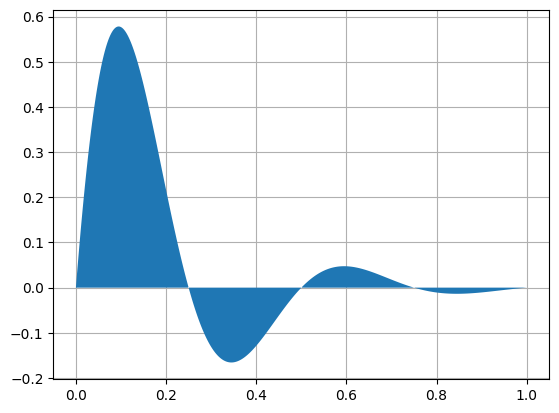

In [2]:
# %load https://matplotlib.org/2.0.2/mpl_examples/lines_bars_and_markers/fill_demo.py
"""
==================
A simple Fill plot
==================

This example showcases the most basic fill plot a user can do with matplotlib.
"""
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 500)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

fig, ax = plt.subplots()

ax.fill(x, y, zorder=10)
ax.grid(True, zorder=5)
plt.show()


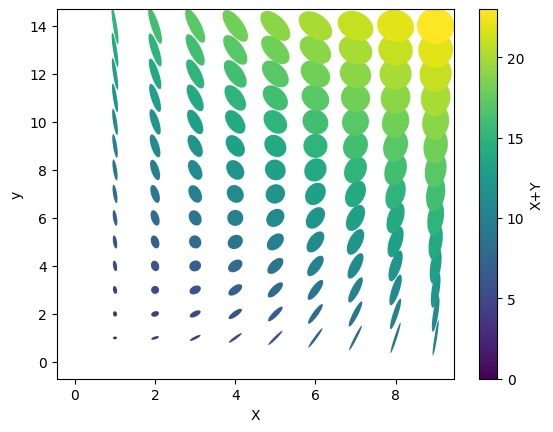

In [3]:
# %load http://matplotlib.org/mpl_examples/pylab_examples/ellipse_collection.py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import EllipseCollection

x = np.arange(10)
y = np.arange(15)
X, Y = np.meshgrid(x, y)

XY = np.hstack((X.ravel()[:, np.newaxis], Y.ravel()[:, np.newaxis]))

ww = X/10.0
hh = Y/15.0
aa = X*9


fig, ax = plt.subplots()

ec = EllipseCollection(ww, hh, aa, units='x', offsets=XY,
                       transOffset=ax.transData)
ec.set_array((X + Y).ravel())
ax.add_collection(ec)
ax.autoscale_view()
ax.set_xlabel('X')
ax.set_ylabel('y')
cbar = plt.colorbar(ec)
cbar.set_label('X+Y')
plt.show()


## Упражнение 2

1) Введите данные в массив NumPy из файла iris5.data. Найдите образцы с ошибками в параметрах и удалите их из набора.
2) Введите данные в DataFrame из файла iris5.data. Найдите образцы с ошибками в параметрах и удалите их из набора.

In [4]:
import numpy as np

data = np.genfromtxt('iris5.data', delimiter=',', usecols=(0, 1, 2, 3))
labels = np.genfromtxt('iris5.data', delimiter=',', dtype='U20', usecols=4)

mask = ~np.isnan(data).any(axis=1)
clean_data = data[mask]
clean_labels = labels[mask]

print("Корректных строк:", clean_data.shape[0])
print("Форма признаков:", clean_data.shape)
print("Примеры признаков:\n", clean_data[:5])
print("Примеры меток:\n", clean_labels[:5])

combined = np.column_stack((clean_data.astype(str), clean_labels))

print("Объединённый массив:", combined.shape)
print("Пример строки:\n", combined[0])

Корректных строк: 146
Форма признаков: (146, 4)
Примеры признаков:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Примеры меток:
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
Объединённый массив: (146, 5)
Пример строки:
 ['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']


In [6]:
import pandas as pd
from pandas import Series, DataFrame

df = pd.read_csv('iris5.data', header=1)

df.replace(to_replace=[None, '', '?'], value=np.nan, inplace=True)
df_clean = df.dropna()

print("Чистый DataFrame, строк:", len(df_clean))
print("Пример:\n", df_clean.head())

Чистый DataFrame, строк: 146
Пример:
    5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


## Упражнение 3

Классификация: 
1) Примените KNeighborsClassifier к набору данных `iris`. Поиграйте с разными значениями `n_neighbors` и понаблюдайте, как меняются результаты обучения и теста.
2) Примените RandomForestClassifier к набору данных `iris`. Поиграйте с разными значениями `n_neighbors` и понаблюдайте, как меняются результаты обучения и теста.

Accuracy: 1.0
Correct indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
Incorrect indices: []


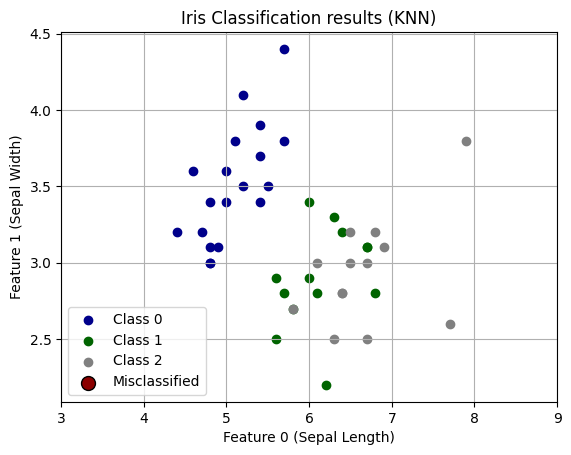

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загружаем данные
iris = load_iris()
X, y = iris.data, iris.target

# Делим на train и test
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7, random_state=42)

# Обучаем классификатор
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(train_X, train_y)

# Предсказание
pred_y = classifier.predict(test_X)

# Точность
print("Accuracy:", accuracy_score(test_y, pred_y))

# Индексы правильных и ошибочных предсказаний
correct_idx = np.where(pred_y == test_y)[0]
incorrect_idx = np.where(pred_y != test_y)[0]

print("Correct indices:", correct_idx)
print("Incorrect indices:", incorrect_idx)

# Визуализация по первым двум признакам
colors = ["darkblue", "darkgreen", "gray"]
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 0], test_X[idx, 1], color=color, label=f"Class {n}")

# Ошибочные точки красным с чёрным контуром
plt.scatter(test_X[incorrect_idx, 0], test_X[incorrect_idx, 1], 
            color="darkred", edgecolor="black", s=100, label="Misclassified")

# Подписи
plt.xlabel("Feature 0 (Sepal Length)")
plt.ylabel("Feature 1 (Sepal Width)")
plt.title("Iris Classification results (KNN)")
plt.xlim(3, 9)
plt.legend(loc=3)
plt.grid(True)
plt.show()

n_estimators = 1 -> Accuracy: 1.00
n_estimators = 5 -> Accuracy: 1.00
n_estimators = 10 -> Accuracy: 1.00
n_estimators = 20 -> Accuracy: 0.98
n_estimators = 50 -> Accuracy: 0.98
n_estimators = 100 -> Accuracy: 0.98


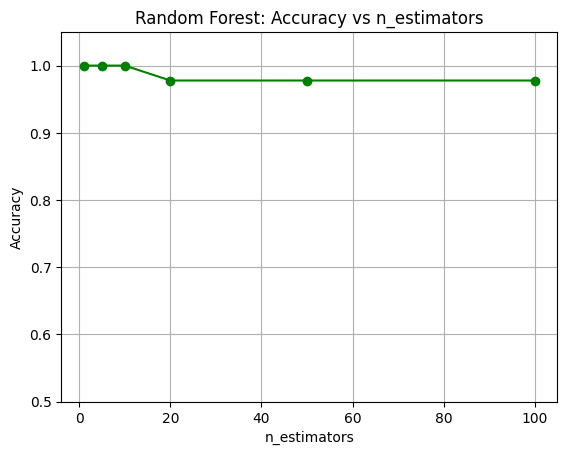

In [8]:
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X, y = iris.data, iris.target

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7, random_state=32)

n_values = [1, 5, 10, 20, 50, 100]
scores = []

for n in n_values:
    model = RandomForestClassifier(n_estimators=n, random_state=32)
    model.fit(train_X, train_y)
    acc = model.score(test_X, test_y)
    scores.append(acc)
    print(f"n_estimators = {n} -> Accuracy: {acc:.2f}")

plt.plot(n_values, scores, marker='o', color='green')
plt.title("Random Forest: Accuracy vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.05)
plt.grid(True)
plt.show()

## Упражнение 4

Сокращение размерности:
Сравните результаты применения PCA, Isomap и t-SNE на 5-классовом подмножестве набора данных цифр (``load_digits(5)``).

*Указание:*
*Для t-SNE руководствуйтесь следующим примером из scikit-learn:*
https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html

In [9]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap

digits = load_digits(n_class=5) 
X = digits.data
y = digits.target

In [10]:
def plot_embedding(X_embedded, title, y):
    plt.figure(figsize=(6, 5))
    for i in np.unique(y):
        idx = y == i
        plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=f"Digit {i}", s=15)
    plt.legend()
    plt.title(title)
    plt.grid(True)

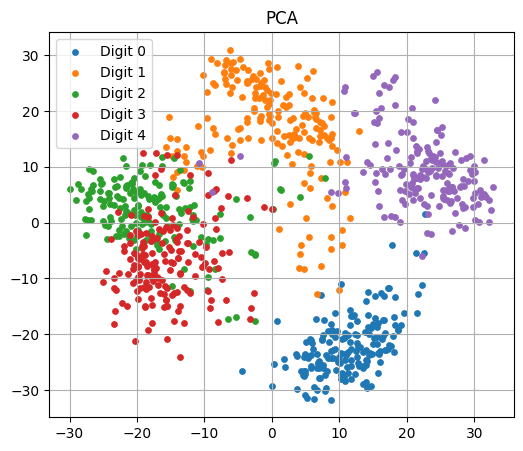

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plot_embedding(X_pca, "PCA", y)

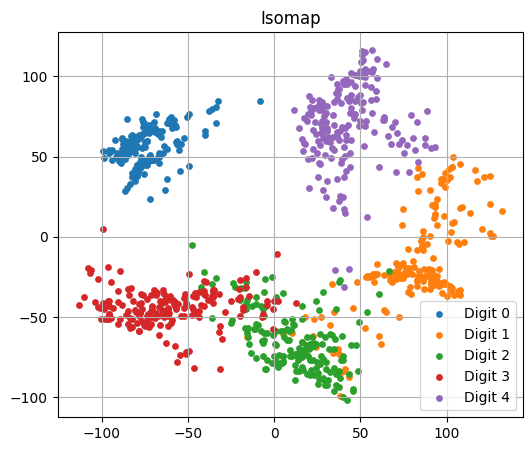

In [12]:
isomap = Isomap(n_components=2, n_neighbors=12)
X_iso = isomap.fit_transform(X)
plot_embedding(X_iso, "Isomap", y)

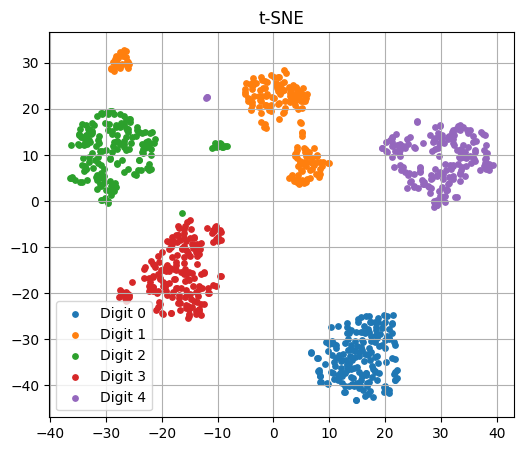

In [13]:
tsne = TSNE(n_components=2, perplexity=30, init='pca', learning_rate='auto', random_state=32)
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "t-SNE", y)

## Упражнение 5
Для набора данных (см. ячейку ниже) с неизотропными кластерами, на которых kmeans не работает, подберите алгоритм кластеризации, который хорошо выделяет очевидные кластеры.

<img src="images/set_3.png" width="400">

In [40]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN, MeanShift, AgglomerativeClustering, SpectralClustering, AffinityPropagation, OPTICS
from sklearn.mixture import GaussianMixture
import hdbscan

X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

In [41]:
gmm = GaussianMixture(n_components=3, random_state=42)

In [42]:
gmm_labels = gmm.fit_predict(X)

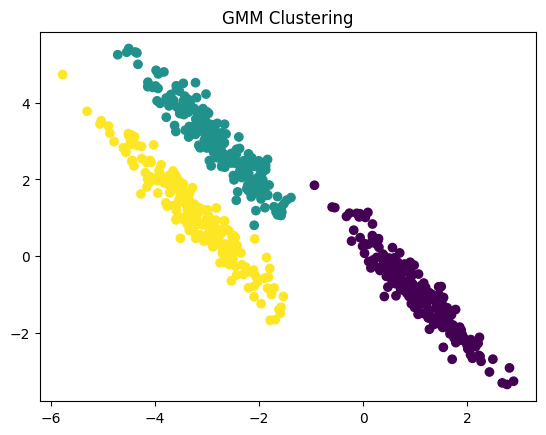

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering')
plt.show()